In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploration & Compréhension

In [2]:
data = pd.read_csv("jobs.csv", encoding="latin-1")
data.head()


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [3]:
data.shape

(3198, 8)

Nous avons un dataset de 3198 entrées et 8 champs

In [4]:
data.dtypes

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object

Toutes les variables sont des objets. Bon à savoir !

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


- Compréhension & Analyse: Nous avons 3198 entrées. 
    - Seules les colonnes "Facilities" et "Requirment of company" sont toutes bien remplies
    - Les colonnes "Company", "Job Title", "Location" ont seulement une valeur manquante
    - La colonne "Experience level" a 2962 entrées sur 3198. Donc près de 93% de valeurs remplies et 7% de valeurs manquantes 
    - La colonne "Salary" a 3009 entrées sur 3198. Donc 94% de valeurs remplies et 6% de valeurs manquantes
    

In [6]:
# Afficher un résumé statistique du DataFrame
summary = data.describe(include='all')
summary


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


- "count": Cela indique le nombre total de valeurs non manquantes (non nulles) dans chaque colonne du DataFrame. Par exemple, il y a 3197 valeurs non manquantes pour la colonne "Company", "Job Title", "Location", etc.

- "unique": Cela représente le nombre d'éléments uniques dans chaque colonne du DataFrame. Par exemple, il y a 1106 entreprises uniques, 2138 titres de poste uniques, 1117 emplacements uniques, etc.

- "top": Cela indique la valeur la plus fréquente (top) dans chaque colonne. Par exemple, "Publicis Groupe" est l'entreprise la plus fréquente dans la colonne "Company", "Data Engineer" est le titre de poste le plus fréquent, "Bengaluru, India" est le lieu le plus fréquent, etc.

- "freq": Cela représente la fréquence (nombre d'occurrences) de la valeur la plus fréquente (top) dans chaque colonne. Par exemple, "Publicis Groupe" apparaît 126 fois dans la colonne "Company", "Data Engineer" apparaît 105 fois dans la colonne "Job Title", "Bengaluru, India" apparaît 90 fois dans la colonne "Location", etc.


Une remarque: Nous n'avons pas de valeurs numériques !

# Data Cleaning

Cette étape consiste à nettoyer les données en corrigeant les erreurs, en supprimant les impuretés pour ne conserver que les valeurs propres, correctes, utiles et pertinentes. Nous serons amenés à:
- Gérer les doublons
- Formattage
- Gérer les valeurs manquantes
- Gérer les valeurs abérrantes et atypiques

## Gestion des doublons

In [7]:
data.duplicated().sum()

202

Nous avons 202 doublons. Nous allons les supprimer pour éviter les conflits de données.

In [8]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

Les doublons ont bien été supprimés

In [9]:
data.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


# Salary

Cette colonne a des valeurs manquantes, des salaires avec différentes dévises (GBP, EUR)

In [10]:
distinct_salary = data["Salary"].unique().tolist()
distinct_salary


[' 48K+ *',
 ' 90K+ *',
 ' 108K+',
 ' 184K+',
 ' 39K+ *',
 nan,
 ' 140K+',
 ' 40K+ *',
 ' 80K+ *',
 ' 35K+ *',
 ' 62K+ *',
 ' 159K+',
 ' 97K+',
 ' 92K+ *',
 ' 129K+ *',
 ' 115K+ *',
 ' 44K+ *',
 ' 73K+ *',
 ' 59K+ *',
 ' 106K+',
 ' 105K+ *',
 ' 55K+ *',
 ' 110K+ *',
 ' 63K+ *',
 ' 49K+ *',
 ' 180K+',
 ' 127K+',
 ' 60K+',
 ' 45K+ *',
 ' 135K+',
 ' 69K+ *',
 ' 176K+',
 ' 65K+ *',
 ' 51K+ *',
 ' 67K+',
 ' 104K+',
 ' 105K+',
 ' 166K+',
 ' 131K+ *',
 ' 115K+',
 ' 43K+',
 ' 81K+ *',
 ' 96K+ *',
 ' 56K+ *',
 ' 130K+',
 ' 131K+',
 ' 50K+ *',
 ' 100K+',
 ' 60K+ *',
 ' 52K+',
 ' 135K+ *',
 ' 76K+',
 ' 172K+',
 ' 119K+',
 ' 125K+',
 ' 116K+',
 ' 77K+ *',
 ' 74K+ *',
 ' 70K+ *',
 ' 120K+',
 ' 189K+',
 ' 149K+',
 ' 110K+',
 ' 90K+',
 ' 30K+ *',
 ' 167K+',
 ' 236K+',
 ' 179K+',
 ' 80K+',
 ' 200K+',
 ' 139K+',
 ' 129K+',
 ' 113K+',
 ' 150K+',
 ' 158K+',
 ' 40K+',
 ' 184K+ *',
 ' 133K+',
 ' 78K+',
 ' 36K+ *',
 ' 122K+ *',
 ' 81K+',
 ' 59K+',
 'EUR 81K',
 ' 190K+',
 ' 72K+',
 ' 136K+',
 ' 102K+ *',
 ' 

Il ya des valeurs manquantes(0 ou en négociation), les dévises ne sont pas uniformes, 

In [11]:
na_salary = data[data["Salary"].isna()]
na_salary.head(50)

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
7,NielsenIQ,Intern (Business Intelligence Service Support),"Bangkok, Thailand",Internship,Entry-level,NaN,"Business Intelligence,Excel,Genetics,,,",",,,,"
8,Western Digital,Summer 2023 Data Engineering Intern,"San Jose, CA, United States",Internship,Entry-level,NaN,"Big Data,Computer Science,Engineering,Machine ...","Career development,Competitive pay,Equity,Flex..."
39,Angi,Senior Data Scientist,"Indianapolis, IN - Hybrid",Full Time,Senior-level,NaN,"Big Data,Data Mining,Machine Learning,Mathemat...","401(k) matching,Career development,Competitive..."
44,REWE International Dienstleistungsgesellschaft...,Junior Data Science Engineer (m/w/x),"Wien, Austria",Full Time,Entry-level,NaN,"CI/CD,Computer Science,Data pipelines,Deep Lea...",",,,,"
75,Metiora,Data Analyst Intern,"Madrid, Spain",Full Time,Entry-level,NaN,"Matplotlib,MongoDB,NumPy,Pandas,Power BI,Python",",,,,"
87,Civis Analytics,Lead Applied Data Scientist (Experience with M...,Remote,Full Time,Senior-level,NaN,"Causal inference,Computer Science,Consulting,D...","401(k) matching,Career development,Competitive..."
168,Faraday Future,Senior Big Data Engineer,"San Jose, California, United States",Full Time,Senior-level,NaN,"Airflow,AWS,Azure,Big Data,Computer Science,Da...","Equity,Relocation support,,,"
170,Wallbox,Analytics Engineer Intern,"Barcelona, Catalonia, Spain",Internship,Entry-level,NaN,"Airflow,BigQuery,CI/CD,Databricks,Data quality...","Career development,Flex hours,Team events,,"
201,Veritone,Data Analytics Engineer,United States,Full Time,Senior-level,NaN,"Agile,APIs,AWS,Business Analytics,Business Int...","401(k) matching,Career development,Competitive..."
208,Publicis Groupe,Senior Associate Data Engineering,"Houston, TX, United States",Full Time,Mid-level,NaN,"Agile,Architecture,AWS,Azure,BigQuery,Bigtable","Career development,Flex hours,Flex vacation,Pa..."


On se rend compte que les valeurs manquantes ne sont pas toutes dépourvues de sens. En fait, les stagiaires n'ont pas forcément un salaire. Ce qui est logique. Donc, nous remplaceront les valeurs manquantes de la colonne Salary par 0 si Job Type = Internship et Experience level = Entry-level. Dans le cas où Job Type ne correspond pas à un stagiaire, il se peut que très probablment, l'employé soit en négociation. Donc nous allons séparer les données des employés non stagiaires qui n'ont pas de salaire. Mais nous allons remplacer finalement toutes les valeurs manquantes par 0 parce que cela n'affectera pas la visualisation. 

In [12]:
data["Salary"] = data["Salary"].fillna(0)
data["Salary"].isna().sum()

0

Les valeurs manquantes dans la colonne Salary sont désormais gérées. Il reste à uniformiser les dévises 

In [13]:
# data.loc[data["Salary"] == 0]
data["Salary"].unique()


array([' 48K+ *', ' 90K+ *', ' 108K+', ' 184K+', ' 39K+ *', 0, ' 140K+',
       ' 40K+ *', ' 80K+ *', ' 35K+ *', ' 62K+ *', ' 159K+', ' 97K+',
       ' 92K+ *', ' 129K+ *', ' 115K+ *', ' 44K+ *', ' 73K+ *', ' 59K+ *',
       ' 106K+', ' 105K+ *', ' 55K+ *', ' 110K+ *', ' 63K+ *', ' 49K+ *',
       ' 180K+', ' 127K+', ' 60K+', ' 45K+ *', ' 135K+', ' 69K+ *',
       ' 176K+', ' 65K+ *', ' 51K+ *', ' 67K+', ' 104K+', ' 105K+',
       ' 166K+', ' 131K+ *', ' 115K+', ' 43K+', ' 81K+ *', ' 96K+ *',
       ' 56K+ *', ' 130K+', ' 131K+', ' 50K+ *', ' 100K+', ' 60K+ *',
       ' 52K+', ' 135K+ *', ' 76K+', ' 172K+', ' 119K+', ' 125K+',
       ' 116K+', ' 77K+ *', ' 74K+ *', ' 70K+ *', ' 120K+', ' 189K+',
       ' 149K+', ' 110K+', ' 90K+', ' 30K+ *', ' 167K+', ' 236K+',
       ' 179K+', ' 80K+', ' 200K+', ' 139K+', ' 129K+', ' 113K+',
       ' 150K+', ' 158K+', ' 40K+', ' 184K+ *', ' 133K+', ' 78K+',
       ' 36K+ *', ' 122K+ *', ' 81K+', ' 59K+', 'EUR 81K', ' 190K+',
       ' 72K+', ' 136K+', 

In [14]:
for salary in data["Salary"]:
    print(salary)


 48K+ *
 48K+ *
 90K+ *
 48K+ *
 108K+
 184K+
 39K+ *
0
0
 140K+
 40K+ *
 80K+ *
 35K+ *
 62K+ *
 39K+ *
 159K+
 97K+
 92K+ *
 48K+ *
 129K+ *
 92K+ *
 115K+ *
 39K+ *
 44K+ *
 73K+ *
 40K+ *
 59K+ *
 106K+
 129K+ *
 92K+ *
 105K+ *
 55K+ *
 115K+ *
 110K+ *
 140K+
 129K+ *
 63K+ *
 49K+ *
 180K+
0
 115K+ *
 62K+ *
 73K+ *
 127K+
0
 60K+
 129K+ *
 92K+ *
 45K+ *
 115K+ *
 135K+
 69K+ *
 129K+ *
 176K+
 65K+ *
 40K+ *
 62K+ *
 48K+ *
 51K+ *
 67K+
 104K+
 92K+ *
 69K+ *
 73K+ *
 115K+ *
 105K+
 51K+ *
 166K+
 62K+ *
 80K+ *
 131K+ *
 62K+ *
 115K+
 69K+ *
 129K+ *
0
 40K+ *
 65K+ *
 43K+
 92K+ *
 45K+ *
 81K+ *
 35K+ *
 69K+ *
 92K+ *
 62K+ *
 65K+ *
0
 115K+ *
 69K+ *
 140K+
 65K+ *
 69K+ *
 96K+ *
 39K+ *
 69K+ *
 56K+ *
 39K+ *
 131K+ *
 62K+ *
 115K+ *
 115K+ *
 130K+
 73K+ *
 92K+ *
 131K+
 44K+ *
 115K+ *
 73K+ *
 50K+ *
 48K+ *
 59K+ *
 100K+
 129K+ *
 60K+ *
 52K+
 62K+ *
 135K+ *
 76K+
 129K+ *
 73K+ *
 92K+ *
 129K+ *
 62K+ *
 50K+ *
 172K+
 119K+
 125K+
 92K+ *
 116K+
 77K+ *

In [15]:
def convert_to_usd(amount, currency):
    if currency == 'EUR':
        return amount * 1.18
    elif currency == 'GBP':
        return amount * 1.38
    else:
        return amount

def extract_numeric_salary(salary_str):
    try:
        return float(salary_str)
    except ValueError:
        currency_code = salary_str[:3]  # Extract the first three characters as currency code
        numeric_salary = salary_str[3:].strip().replace(',', '')  # Extract the numeric part and remove commas
        return convert_to_usd(float(numeric_salary), currency_code)

data["Salary"] = data["Salary"].str.replace('K', '').str.replace('*', '').str.replace('+', '')
data["Salary"] = data["Salary"].apply(extract_numeric_salary) * 1000

for x in data["Salary"]:
    print(x)


48000.0
48000.0
90000.0
48000.0
108000.0
184000.0
39000.0
nan
nan
140000.0
40000.0
80000.0
35000.0
62000.0
39000.0
159000.0
97000.0
92000.0
48000.0
129000.0
92000.0
115000.0
39000.0
44000.0
73000.0
40000.0
59000.0
106000.0
129000.0
92000.0
105000.0
55000.0
115000.0
110000.0
140000.0
129000.0
63000.0
49000.0
180000.0
nan
115000.0
62000.0
73000.0
127000.0
nan
60000.0
129000.0
92000.0
45000.0
115000.0
135000.0
69000.0
129000.0
176000.0
65000.0
40000.0
62000.0
48000.0
51000.0
67000.0
104000.0
92000.0
69000.0
73000.0
115000.0
105000.0
51000.0
166000.0
62000.0
80000.0
131000.0
62000.0
115000.0
69000.0
129000.0
nan
40000.0
65000.0
43000.0
92000.0
45000.0
81000.0
35000.0
69000.0
92000.0
62000.0
65000.0
nan
115000.0
69000.0
140000.0
65000.0
69000.0
96000.0
39000.0
69000.0
56000.0
39000.0
131000.0
62000.0
115000.0
115000.0
130000.0
73000.0
92000.0
131000.0
44000.0
115000.0
73000.0
50000.0
48000.0
59000.0
100000.0
129000.0
60000.0
52000.0
62000.0
135000.0
76000.0
129000.0
73000.0
92000.0
129000.0

In [16]:
data["Salary"] = data["Salary"].fillna(0)
data["Salary"].isna().sum()

0

In [17]:
for x in data["Salary"]:
    print(x)

48000.0
48000.0
90000.0
48000.0
108000.0
184000.0
39000.0
0.0
0.0
140000.0
40000.0
80000.0
35000.0
62000.0
39000.0
159000.0
97000.0
92000.0
48000.0
129000.0
92000.0
115000.0
39000.0
44000.0
73000.0
40000.0
59000.0
106000.0
129000.0
92000.0
105000.0
55000.0
115000.0
110000.0
140000.0
129000.0
63000.0
49000.0
180000.0
0.0
115000.0
62000.0
73000.0
127000.0
0.0
60000.0
129000.0
92000.0
45000.0
115000.0
135000.0
69000.0
129000.0
176000.0
65000.0
40000.0
62000.0
48000.0
51000.0
67000.0
104000.0
92000.0
69000.0
73000.0
115000.0
105000.0
51000.0
166000.0
62000.0
80000.0
131000.0
62000.0
115000.0
69000.0
129000.0
0.0
40000.0
65000.0
43000.0
92000.0
45000.0
81000.0
35000.0
69000.0
92000.0
62000.0
65000.0
0.0
115000.0
69000.0
140000.0
65000.0
69000.0
96000.0
39000.0
69000.0
56000.0
39000.0
131000.0
62000.0
115000.0
115000.0
130000.0
73000.0
92000.0
131000.0
44000.0
115000.0
73000.0
50000.0
48000.0
59000.0
100000.0
129000.0
60000.0
52000.0
62000.0
135000.0
76000.0
129000.0
73000.0
92000.0
129000.0

## Company

In [18]:
missing_values_count = data["Company"].isna().sum()
print("Number of missing values in 'Company' column:", missing_values_count)


Number of missing values in 'Company' column: 1


In [19]:
data.loc[data["Company"].isna()]


,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
797,NaN,NaN,NaN,NaN,NaN,0.0,",,,,,",",,,,"


La ligne n'a aucune information qui soit utile. Nous allons donc la supprimer

In [20]:
data.dropna(subset=['Company'], inplace=True)
data["Company"].isna().sum()

0

In [21]:
data.loc[data["Company"].isna()]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities


La ligne est bien supprimée

La ligne ligne a bien été supprimée. Passons à la colonne Job Title

### Colonne Job Title

In [22]:
data["Job Title"].isna().sum()

0

In [23]:
data["Job Title"].unique()

array(['Clinical Data Analyst', 'AML/CFT & Data Analyst',
       'Machine Learning Engineer', ...,
       'Application Integration Engineer, Computer Vision Program',
       'Senior Software Engineer, Machine Learning - Ads Intelligence',
       'Data Scientist - New College Graduate'], dtype=object)

In [25]:
data["Location"].unique().tolist()

['Richardson, TX, United States',
 'Ebène, Mauritius',
 'South Jordan, UT, United States',
 'Nonantola, Italy',
 'Arlington, VA, United States',
 'Kirkland, Washington, United States',
 'Porto, Portugal',
 'Bangkok, Thailand',
 'San Jose, CA, United States',
 'Santa Clara, CA, United States',
 'Geneva, Switzerland',
 'Toronto, ON, Canada',
 'Mumbai, India',
 'Braga, Portugal',
 'Gerlingen, Germany',
 'United States, Aliso Viejo, CA',
 'Sydney, New South Wales, Australia',
 'Braga',
 'Remote job',
 'Tallinn',
 'Bengaluru, India',
 'Málaga, Spain',
 'Plymouth, MI, United States',
 'Remote Worldwide',
 'Houston, TX, United States',
 'Saint-Herblain, France',
 'New York City, United States',
 'Mexico City, Mexico',
 'São Paulo, State of São Paulo, Brazil \x85',
 'Poland or Eastern Europe remote',
 'Batu Kawan, Malaysia',
 'Lehi, Utah, Open to Remote',
 'Barcelona, Spain',
 'Los Angeles, CA',
 'Wroclaw, PL',
 'Mount Prospect, IL, United States',
 'Buenos Aires, Buenos Aires, Argentina - Rem

### Colonne Location 

In [24]:
data["Location"].isna().sum()

0

### Colonne Job Type

In [26]:
data["Job Type"].isna().sum()

0

Les valeurs manquantes des colonnes Job Type, Location,Job Title et Company étaient dans la meme entrée et la ligne est désormais supprimée.
- Passons à la colonne Experience level

### Experience level 

In [27]:
data["Experience level"].isna().sum()

227

Il y a exactement 227 valeurs manquantes. Allons-nous les supprimer ? Nous allons éviter au maximum de supprimer. Nous allons tenter une amputation. Le salaire normalement augmente en fonction de l'expérience. Donc nous allons tenter une amputation par modèle de machine learning.

In [28]:
data["Experience level"].unique()


array(['Entry-level', nan, 'Mid-level', 'Senior-level', 'Executive-level'],
      dtype=object)

In [29]:
na_xp_level = data.loc[data["Experience level"].isna()]
na_xp_level

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
11,NielsenIQ,Data Analyst - Revenue Optimizer,"Toronto, ON, Canada",Full Time,NaN,80000.0,"Business Analytics,Business Intelligence,Data ...","Career development,Startup environment,,,"
18,Issuu,BI Analyst,Braga,Full Time,NaN,48000.0,"Business Analytics,Business Intelligence,Data ...","Competitive pay,Equity,Health care,Insurance,"
36,Bosch Group,Data Science Lead (Hybrid),"Mount Prospect, IL, United States",Full Time,NaN,63000.0,"A/B testing,Data visualization,Economics,Engin...","Career development,Competitive pay,Health care,,"
69,SSENSE,"Data Analyst, Customer Experience","Montreal, QC, Canada",Full Time,NaN,80000.0,"Business Intelligence,Computer Science,CX,Data...","Career development,Startup environment,,,"
...,...,...,...,...,...,...,...,...
3149,Syngenta Group,Agronomy Data Scientist (M/W) - CDI,"Saint-Sauveur, France",Full Time,NaN,90000.0,"Computer Science,D3,Data analysis,Data Mining,...","Career development,,,,"
3157,Precision for Medicine,Data Engineer,"Remote, United States",Full Time,NaN,70000.0,"AWS,Biology,Data management,Git,Linux,MySQL","Health care,Insurance,Parental leave,Salary bo..."
3163,Informa Group Plc.,Data Operations Engineer,"Toronto, ON, Canada",Full Time,NaN,60000.0,"Agile,AWS,DataOps,Engineering,ETL,Pipelines","Career development,Flex hours,Flex vacation,He..."
3172,Precision Medicine Group,Data Engineer,"Remote, United States",Full Time,NaN,70000.0,"AWS,Biology,Data management,Git,Linux,MySQL","Health care,Insurance,Parental leave,Salary bo..."


In [30]:
Xp_Salary = data[["Experience level", "Salary"]]
Xp_Salary_without_na = data[["Experience level", "Salary"]].dropna(subset=["Experience level", "Salary"])

In [31]:
data["Experience level"] = data["Experience level"].fillna("Not Specified")
data.loc[data["Experience level"] == "Not Specified"]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,No Specified,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
11,NielsenIQ,Data Analyst - Revenue Optimizer,"Toronto, ON, Canada",Full Time,No Specified,80000.0,"Business Analytics,Business Intelligence,Data ...","Career development,Startup environment,,,"
18,Issuu,BI Analyst,Braga,Full Time,No Specified,48000.0,"Business Analytics,Business Intelligence,Data ...","Competitive pay,Equity,Health care,Insurance,"
36,Bosch Group,Data Science Lead (Hybrid),"Mount Prospect, IL, United States",Full Time,No Specified,63000.0,"A/B testing,Data visualization,Economics,Engin...","Career development,Competitive pay,Health care,,"
69,SSENSE,"Data Analyst, Customer Experience","Montreal, QC, Canada",Full Time,No Specified,80000.0,"Business Intelligence,Computer Science,CX,Data...","Career development,Startup environment,,,"
...,...,...,...,...,...,...,...,...
3149,Syngenta Group,Agronomy Data Scientist (M/W) - CDI,"Saint-Sauveur, France",Full Time,No Specified,90000.0,"Computer Science,D3,Data analysis,Data Mining,...","Career development,,,,"
3157,Precision for Medicine,Data Engineer,"Remote, United States",Full Time,No Specified,70000.0,"AWS,Biology,Data management,Git,Linux,MySQL","Health care,Insurance,Parental leave,Salary bo..."
3163,Informa Group Plc.,Data Operations Engineer,"Toronto, ON, Canada",Full Time,No Specified,60000.0,"Agile,AWS,DataOps,Engineering,ETL,Pipelines","Career development,Flex hours,Flex vacation,He..."
3172,Precision Medicine Group,Data Engineer,"Remote, United States",Full Time,No Specified,70000.0,"AWS,Biology,Data management,Git,Linux,MySQL","Health care,Insurance,Parental leave,Salary bo..."


In [39]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import OrdinalEncoder

# # Rest of the code remains unchanged...

# # Convert "Experience level" to strings
# data["Experience level"] = data["Experience level"].astype(str)

# # Convert "Experience level" to numerical representation using ordinal encoding
# ordinal_encoder = OrdinalEncoder()
# # Replace missing "Experience level" values with a placeholder (e.g., -1) before encoding
# data["Experience level"].fillna("-8", inplace=True)  # Placeholder for missing values

# # Convert "Salary" to numeric (if it's not already)
# data["Salary"] = data["Salary"].astype(float)

# # Step 2: Split the data into training and test sets
# X = data[["Salary", "Experience level"]]
# X = X.dropna(subset=["Experience level"])  # Drop rows with missing "Experience level"
# y = X.pop("Experience level")  # Extract the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Choose and train a machine learning model
# model = RandomForestClassifier()  # You can choose a different model here if needed
# model.fit(X_train, y_train)

# # Step 4: Use the trained model to predict "Experience level" for missing values
# # Find rows with missing "Experience level"
# missing_experience_rows = data[data["Experience level"].isna()]

# if len(missing_experience_rows) == 0:
#     print("No missing rows found with 'Experience level'.")
# else:
#     # Predict "Experience level" for missing rows based on "Salary"
#     predicted_experience = model.predict(missing_experience_rows[["Salary"]])

#     # Step 5: Fill in the missing values in the original DataFrame with the predicted values
#     data.loc[data["Experience level"] == "-8", "Experience level"] = predicted_experience

#     # Convert back to original labels for "Experience level"
#     data["Experience level"] = ordinal_encoder.inverse_transform(data[["Experience level"]].astype(int))

# # # Step 6: Save the updated DataFrame to a new CSV file (if needed)
# # data.to_csv("updated_data.csv", index=False)


No missing rows found with 'Experience level'.


In [37]:
data["Experience level"].isna().sum()

0

In [32]:
data["Experience level"].unique()


array(['Entry-level', 'No Specified', 'Mid-level', 'Senior-level',
       'Executive-level'], dtype=object)

Plus de valeurs manquantes !

In [33]:
xp_level = data.loc[data["Experience level"].isna()]
xp_level

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities


In [54]:
# Supposons que votre DataFrame s'appelle data
data["Experience level"].fillna("Not Specified", inplace=True)


In [55]:
data["Experience level"].isna().sum()

0

In [40]:
# import requests

# # Remplacez 'YOUR_USERNAME' par votre nom d'utilisateur GeoNames
# USERNAME = 'yonlifidelis'

# # Liste de localisations (vous pouvez remplacer cette liste par vos données)
# locations = data_column
# # Fonction pour vérifier si une localisation est une ville valide en utilisant GeoNames API
# def is_valid_city(location):
#     url = f"http://api.geonames.org/searchJSON?q={location}&maxRows=1&username={USERNAME}"

#     response = requests.get(url)
#     data = response.json()

#     # Si l'API renvoie des résultats et que le type est "geoname", c'est une ville valide
#     return 'geonames' in data and len(data['geonames']) > 0 and data['geonames'][0]['fclName'] == 'city, village,...'

# # Filtrer les noms de villes valides
# valid_cities = [location for location in locations if is_valid_city(location)]

# # Afficher les noms de villes valides
# print("Noms de villes valides :")
# print(valid_cities)


Noms de villes valides :
[]


# Data Analysis

Cette étape va consister à donner réponse à un certain nombre de questions

- Identifier les tendances clés du marché de l'emploi en IA, DS et Big Data.
- Mettre en évidence les compétences les plus demandées et les titres de poste les plus courants dans ces domaines.
- Analyser les différences et les similitudes entre les opportunités d'emploi en IA, DS et Big Data.

- Quelles sont les compétences les plus demandées ?
- Quels sont les postes les plus recherchés ?
- Quels sont les jobs les mieux les payés ?
- Quels sont les pays qui recrutent le plus ?
- Quels sont les pays qui paient le mieux ?
- Les pays qui recrutent le plus sont-ils ceux qui paient le mieux ?
- Quelles sont les compagnies qui recrutent le plus ?

# Identifier les tendances clés du marché de l'emploi en IA, DS, Big Data

###  Quelles sont les compétences les plus demandées ?

In [34]:
data

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,No Specified,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3190,CCRi,"Application Integration Engineer, Computer Vis...","Chantilly, Virginia, United States",Full Time,Mid-level,113000.0,"Agile,Angular,APIs,Architecture,AWS,Azure","401(k) matching,Career development,Flex hours,..."
3191,Publicis Groupe,"Associate Director, Data Science","New York City, United States",Full Time,Mid-level,106000.0,"Bayesian,Classification,Clustering,Data analys...","Career development,Health care,,,"
3192,DoorDash,"Senior Software Engineer, Machine Learning - A...","Sunnyvale, CA; San Francisco, CA; New York",Full Time,Senior-level,176000.0,"Computer Science,Data analysis,Engineering,Exc...","401(k) matching,Career development,Equity,Insu..."
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39000.0,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"


In [56]:
from collections import Counter

# Assuming the column name is "Requirment of the company" (with a space at the end)
# You can remove the space in the column name before using this code

# Create a list of skills from the column "Requirment of the company"
skills = data["Requirment of the company "].tolist()

# Count the occurrences of each unique skill
skill_counts = Counter(skills)

# Count the total occurrences of each element in skill_counts across all elements in skills
total_skill_counts = Counter()
for element, count in skill_counts.items():
    elements_list = element.split(',')
    total_skill_counts.update(Counter(elements_list))

# Print the result for each unique skill and its total count across all elements
for skill, count in total_skill_counts.items():
    print(f"{skill}: {count}")


Computer Science: 944
Data quality: 232
Genetics: 75
Mathematics: 156
SAS: 10
Statistics: 48
Agile: 467
Data management: 218
Finance: 185
Security: 51
: 678
Architecture: 615
AWS: 674
Computer Vision: 154
Deep Learning: 241
Engineering: 886
Industrial: 61
Oracle: 25
Power BI: 122
R: 91
R&D: 17
Azure: 412
Consulting: 234
Dataflow: 19
Data pipelines: 264
Machine Learning: 423
NLP: 43
NumPy: 14
Banking: 134
Excel: 286
Business Intelligence: 360
Big Data: 473
Matlab: 17
APIs: 315
Data analysis: 474
Keras: 15
PhD: 68
Business Analytics: 59
Economics: 151
Data Analytics: 346
Market research: 24
Privacy: 77
Spark: 24
BigQuery: 173
LLMs: 48
Pandas: 16
Python: 254
CUDA: 20
Docker: 92
Git: 74
GitHub: 37
GitLab: 12
Redshift: 6
Data warehouse: 111
Looker: 69
Data visualization: 237
Metabase: 7
E-commerce: 107
Airflow: 243
Clustering: 72
Data governance: 146
Data Mining: 152
Blockchain: 66
Databricks: 149
SQL: 128
CI/CD: 168
DevOps: 88
ETL: 165
Crypto: 56
Fraud risk: 2
Tableau: 31
Cybernetics: 3
Da

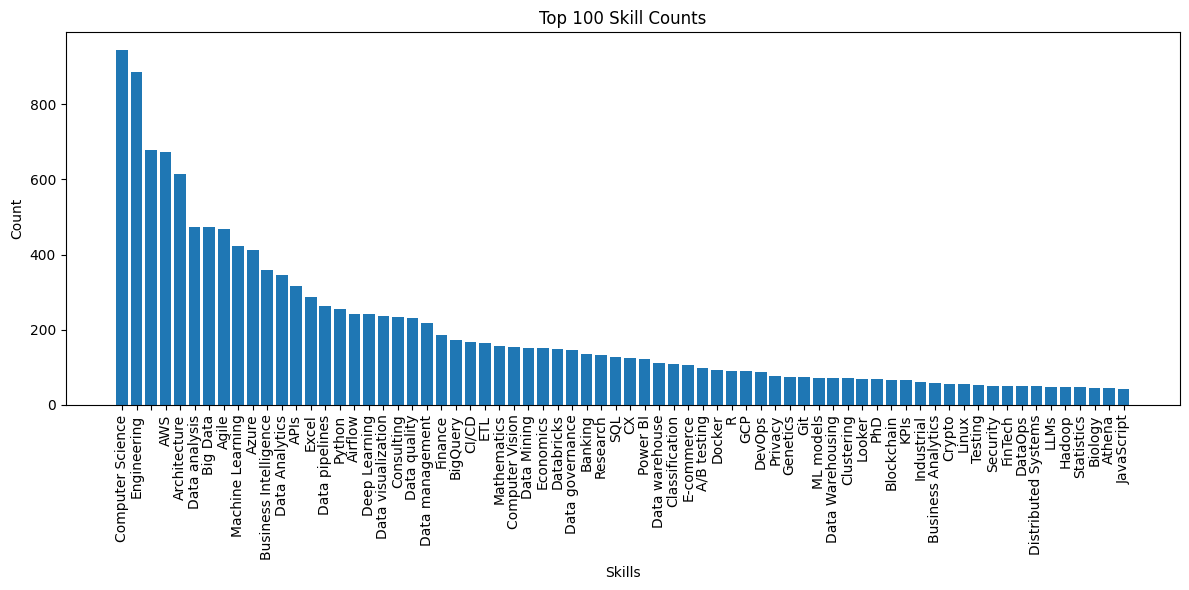

In [61]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt


# Convert the Counter to a pandas DataFrame for easier plotting
skill_counts_df = pd.DataFrame.from_dict(total_skill_counts, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False)

# Take the top 50 skills
top_130_skills = skill_counts_df.head(130)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_50_skills.index, top_130_skills['Count'])
plt.xticks(rotation=90)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 100 Skill Counts')
plt.tight_layout()
plt.show()

Les résultats présents nous révèlent que dans les compétences les plus demandées en IA, DS et Big Data sont entre autres:

- Big Data

    - APIs
    - Excel
    - Python
    - Airflow
    - Data Management
    - BigQuery
    - ETL
    - Data Warehouse
    - Databricks
    - Data pipelines
    - Data Government
    - SQL
    - Docker
    - Hadoop
    - DataOps
    - R
    - Distributed Systems

 - Data Science
 
    - Data mining
    - Data analysis
    - Data Analytics
    - Data Vizualisation
    - Power BI
    - Buisiness Intelligence
    - R
    - Python
    - Statistics
    - Mathematics

 - AI
 
    - Machine Learning
    - ML models
    - Classification
    - Deep Learning 
    - Clustering
    - Computer vision
    - Python
    - JavaScript   
 
 - Autres
   - AWS
   - Azure
   - Git
   - CI/CD
   - Docker
   